# Support Vector Regression (SVR)

## Importing the libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [24]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [25]:
print(X) # X (features) contains a 2D array

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [26]:
print(y) # y (dependent variable) contains a 1D vector

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [27]:
y = y.reshape(len(y), 1) # len(y) rows and 1 column for scaling
print(y) # y converted from a 1D vector to a 2D array

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler_level = StandardScaler() # scaler for features from 1 to 10
X = scaler_level.fit_transform(X)
scaler_salary = StandardScaler() # scaler for dependent var from 45000 to 1000000 
y = scaler_salary.fit_transform(y)

In [29]:
print(X) # X scaled

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [30]:
print(y) # y scaled

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [43]:
y = y.reshape(len(y)) # going back to a 1D vector for regression
print(y) # y (dependent variable) contains a 1D vector scaled

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


## Training the SVR model on the whole dataset

In [44]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') # Gaussian Radial Basis Function (RBF)
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [47]:
new_feature = [[6.5]]
new_feature_scaled = scaler_level.transform(new_feature)
print(new_feature_scaled)

[[0.34815531]]


In [48]:
new_prediction_scaled = regressor.predict(new_feature_scaled)
new_prediction = scaler_salary.inverse_transform(new_prediction_scaled)
print(new_prediction)

[170370.0204065]


## Visualising the SVR results

In [82]:
y_pred = regressor.predict(X)
y_pred_values = scaler_salary.inverse_transform(y_pred)
X_values = scaler_level.inverse_transform(X)
y_values = scaler_salary.inverse_transform(y)

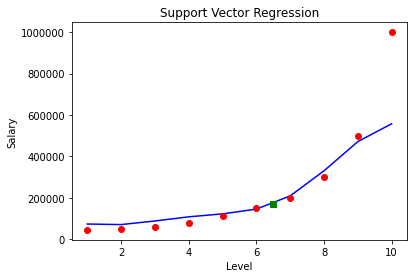

In [90]:
figure, axes = plt.subplots() 
axes.ticklabel_format(style='plain') # don't use sci notation
plt.scatter(X_values, y_values, color='red', zorder=2)
plt.plot(X_values, y_pred_values, color='blue', zorder=1)
plt.plot(new_feature, new_prediction, 's', color='green', zorder=2)
plt.title('Support Vector Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

In [84]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
y_grid = regressor.predict(X_grid)
X_grid_values = scaler_level.inverse_transform(X_grid)
y_grid_values = scaler_salary.inverse_transform(y_grid)

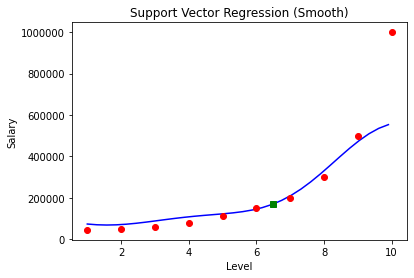

In [91]:
figure, axes = plt.subplots() 
axes.ticklabel_format(style='plain') # don't use sci notation
plt.scatter(X_values, y_values, color='red', zorder=2)
plt.plot(X_grid_values, y_grid_values, color='blue', zorder=1)
plt.plot(new_feature, new_prediction, 's', color='green', zorder=2)
plt.title('Support Vector Regression (Smooth)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()